## Asosiasi (Market Basket Analysis)
## Nama : David Jonathan Tjong
## NIM : 2211016310007

## Exploratory Data Analysis

Dataset Groceries merupakan dataset yang didapat dari kaggle yang berisikan data transaksi belanja bahan makan dari suatu supermarket. Setiap record menggambarkan 1 transaksi yang dilakukan oleh seorang customer. link dataset: https://www.kaggle.com/datasets/irfanasrullah/groceries/data

Terdapat 9835 record dan 33 fitur, pada fitur pertama yaitu item(s) merupakan jumlah item yang dibeli pada 1 transaksi sedangkan fitur ke 2 hingga ke 33 merupakan item yang dibeli oleh customer. Item pada dataset ini memiliki 169 unique item yang berarti itulah yang akan menjadi fiturnya saat data selesai di preprocessing

Disini dapat dilihat bahwa setiap transaksi memiliki missing value yang nanti akan diubah ke 0 dan dataset belum bisa di lakukan pemodelan sehingga perlu diproses ke format tabular transaksi nantinya

In [36]:
import pandas as pd

# mengimport dataset
df = pd.read_csv("groceries - groceries.csv")

# melihat informasi data
df.info(), df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Data columns (total 33 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Item(s)  9835 non-null   int64 
 1   Item 1   9835 non-null   object
 2   Item 2   7676 non-null   object
 3   Item 3   6033 non-null   object
 4   Item 4   4734 non-null   object
 5   Item 5   3729 non-null   object
 6   Item 6   2874 non-null   object
 7   Item 7   2229 non-null   object
 8   Item 8   1684 non-null   object
 9   Item 9   1246 non-null   object
 10  Item 10  896 non-null    object
 11  Item 11  650 non-null    object
 12  Item 12  468 non-null    object
 13  Item 13  351 non-null    object
 14  Item 14  273 non-null    object
 15  Item 15  196 non-null    object
 16  Item 16  141 non-null    object
 17  Item 17  95 non-null     object
 18  Item 18  66 non-null     object
 19  Item 19  52 non-null     object
 20  Item 20  38 non-null     object
 21  Item 21  29 non-null     object
 22  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(None,
    Item(s)            Item 1               Item 2          Item 3  \
 0        4      citrus fruit  semi-finished bread       margarine   
 1        3    tropical fruit               yogurt          coffee   
 2        1        whole milk                  NaN             NaN   
 3        4         pip fruit               yogurt    cream cheese   
 4        4  other vegetables           whole milk  condensed milk   
 
                      Item 4 Item 5 Item 6 Item 7 Item 8 Item 9  ... Item 23  \
 0               ready soups    NaN    NaN    NaN    NaN    NaN  ...     NaN   
 1                       NaN    NaN    NaN    NaN    NaN    NaN  ...     NaN   
 2                       NaN    NaN    NaN    NaN    NaN    NaN  ...     NaN   
 3              meat spreads    NaN    NaN    NaN    NaN    NaN  ...     NaN   
 4  long life bakery product    NaN    NaN    NaN    NaN    NaN  ...     NaN   
 
   Item 24 Item 25 Item 26 Item 27 Item 28 Item 29 Item 30 Item 31 Item 32  
 0     NaN  

Mencek apa ada item data transaksi yang duplikat

In [37]:
# mecek apa ada item pada data transaksi yang duplikat secara sederhana saja
single_item_transactions = df[df["Item(s)"] == 2]
# Tampilkan data yang terfilter
print(single_item_transactions.head(20))


     Item(s)                     Item 1                 Item 2 Item 3 Item 4  \
9          2                 whole milk                cereals    NaN    NaN   
14         2                    chicken         tropical fruit    NaN    NaN   
21         2                butter milk                 pastry    NaN    NaN   
25         2              bottled water            canned beer    NaN    NaN   
35         2                     pastry                   soda    NaN    NaN   
42         2                    berries                 yogurt    NaN    NaN   
46         2                     pastry          bottled water    NaN    NaN   
61         2                    sausage                 pastry    NaN    NaN   
66         2                curd cheese                 coffee    NaN    NaN   
67         2             red/blush wine             newspapers    NaN    NaN   
79         2               frozen meals                 coffee    NaN    NaN   
86         2                     coffee 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


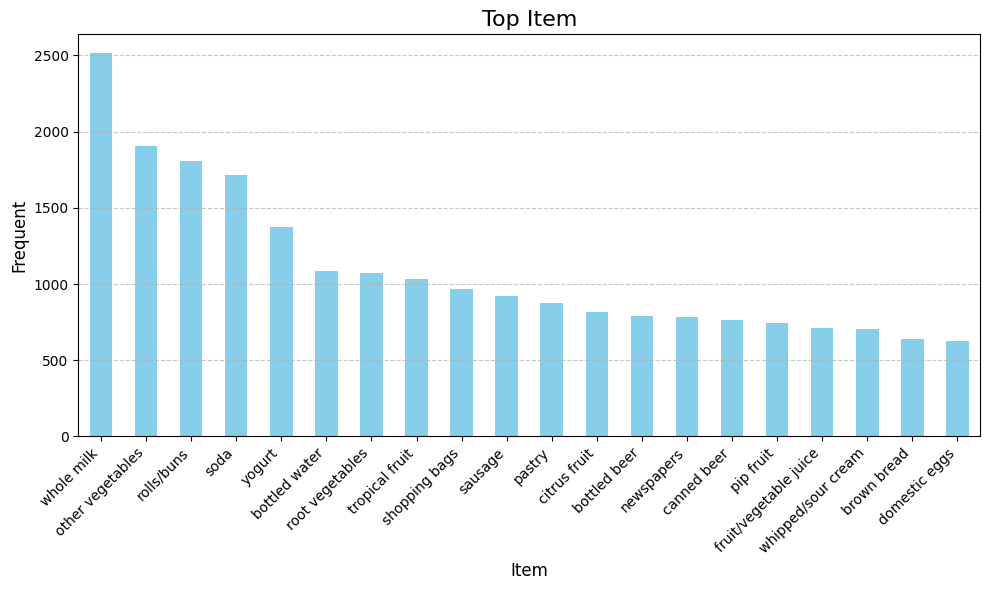

In [38]:
import matplotlib.pyplot as plt

# Melihat Item yang paling sering muncul
# menghitung jumlah item untuk semua baris mulai dari fitur item 1 - item 32 , nilai null otomatis diabaikan oleh stack
items = df.loc[:, 'Item 1':].stack()
item_count = items.value_counts()
top_items = item_count.head(20) # mengambil 20 saja supaya tampilannya tidak hancur

# menampilkan informasi dalam bentuk diagram batang
plt.figure(figsize=(10, 6))
top_items.plot(kind='bar', color='skyblue')
plt.title('Top Item', fontsize=16)
plt.xlabel('Item', fontsize=12)
plt.ylabel('Frequent', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


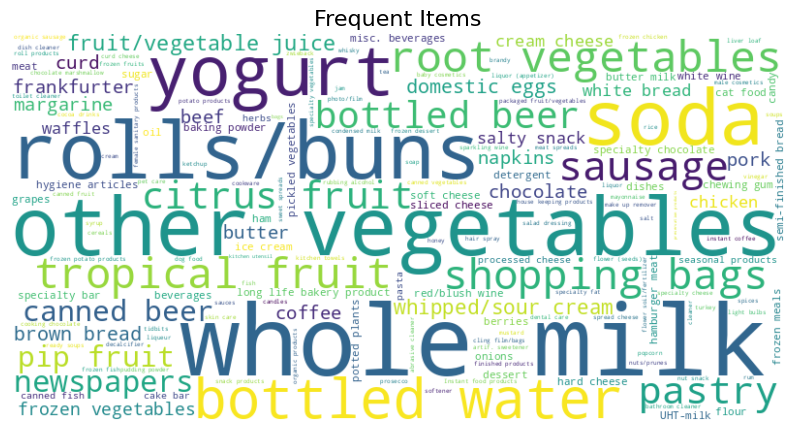

In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Melihat nama item yang paling sering muncul untuk keseluruhan data dengan word cloud
all_item = items.value_counts()
wordcloud_data = all_item.to_dict()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_data)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Frequent Items', fontsize=16)
plt.show()


## Preprocessing Data

Merubah tabel ke format tabular transaksi

In [40]:
# mengambil semua baris pada kolom item 1 hingga kolom terakhir dan menyimpan isi nilai yang uniqe untuk dijadikan kolom
all_items = df.loc[:, 'Item 1':].stack().unique()
encoding_item = pd.DataFrame(0, index=df.index, columns=all_items)

# Melakukan encoding dan mengganti missing value menjadi 0
for index, row in df.iterrows():
    items = row['Item 1':].dropna()
    encoding_item.loc[index, items] = 1

# cek tabel
print(encoding_item.head())
# hasilnya sesuai dengan dataset awal terdapat 169 unique item sehingga ada 169 kolom

# buat data menjadi csv untuk melihat hasilnya
tabel_baru = pd.DataFrame(encoding_item)
tabel_baru.to_csv("ProcessedTabel.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   citrus fruit  semi-finished bread  margarine  ready soups  tropical fruit  \
0             1                    1          1            1               0   
1             0                    0          0            0               1   
2             0                    0          0            0               0   
3             0                    0          0            0               0   
4             0                    0          0            0               0   

   yogurt  coffee  whole milk  pip fruit  cream cheese  ...  baby food  \
0       0       0           0          0             0  ...          0   
1       1       1           0          0             0  ...          0   
2       0       0           1          0             0  ...          0   
3       1       0           0          1             1  ...          0   
4       0       0           1          0             0  ...          0   

   pudding powder  tidbits  whisky  frozen fruits  bags  cooking chocolate

Menghapus baris yang duplikat: Ketika duplikat dihapus, frekuensi absolut itemset menurun, sehingga hubungan antara antecedents dan consequents menjadi terlihat lebih "lemah" tetapi proporsi aturan spesifik meningkat, membantu menemukan pola tambahan yang tidak muncul (mencari pola yang lebih unik)

jika ingin mempertahankan transaksi yang duplikat (opsional): ingin fokus pada Liftnya (hubungan relatif antara antecedents dan consequents atau kemungkinan item tersebut dibeli bersamaan daripada dibeli terpisah)

In [41]:
tabel_dua = pd.DataFrame(tabel_baru)
dataset = tabel_dua.drop_duplicates()
display(dataset)

# buat data menjadi csv untuk melihat hasilnya
lihat_dataset = pd.DataFrame(dataset)
lihat_dataset.to_csv("hasil_hapusduplikattransaksi.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,citrus fruit,semi-finished bread,margarine,ready soups,tropical fruit,yogurt,coffee,whole milk,pip fruit,cream cheese,...,baby food,pudding powder,tidbits,whisky,frozen fruits,bags,cooking chocolate,sound storage medium,kitchen utensil,preservation products
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9829,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9830,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9833,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Pembuatan Model

Model dengan algoritma apriori

In [42]:
from mlxtend.frequent_patterns import association_rules, apriori
# melakukan training dengan apriori
# menggunakan minimum support 0,1 yang berarti item muncul minimal 10% pada keseluruhan transaksi yang dipertimbangkan
frequent_itemsets = apriori(dataset, min_support=0.01, use_colnames=True)
frequent_itemsets.sort_values('support', ascending=False).head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
6,0.316931,(whole milk)
9,0.251890,(other vegetables)
14,0.211525,(rolls/buns)
27,0.195692,(soda)
4,0.180288,(yogurt)
38,0.146627,(root vegetables)
3,0.139352,(tropical fruit)
20,0.134646,(bottled water)
47,0.127086,(shopping bags)
45,0.121095,(sausage)


Model dengan fp-growth

In [43]:
from mlxtend.frequent_patterns import fpgrowth
# melakukan training dengan apriori
# menggunakan minimum support 0,1 yang berarti item muncul minimal 10% pada keseluruhan transaksi yang dipertimbangkan
frequent_itemsets_fpg = fpgrowth(dataset, min_support=0.01, use_colnames=True)
frequent_itemsets_fpg.sort_values('support', ascending=False).head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
6,0.316931,(whole milk)
9,0.251890,(other vegetables)
14,0.211525,(rolls/buns)
26,0.195692,(soda)
3,0.180288,(yogurt)
38,0.146627,(root vegetables)
4,0.139352,(tropical fruit)
19,0.134646,(bottled water)
46,0.127086,(shopping bags)
45,0.121095,(sausage)


# Metode Evaluasi

Menghasilkan rules dengan apriosi

In [44]:
# update library terbaru memerlukan tambahan parameter
num_itemsets = len(frequent_itemsets)
# Menghasilkan rules berdasarkan confidance
rules = association_rules(frequent_itemsets, num_itemsets=num_itemsets, metric="confidence", min_threshold=0.50)
# Tampilkan hasil
print(rules.sort_values(by=['confidence'], ascending=False).head(10))
rules.shape


                                    antecedents         consequents  \
14                             (butter, yogurt)        (whole milk)   
29                    (root vegetables, butter)        (whole milk)   
39   (other vegetables, tropical fruit, yogurt)        (whole milk)   
41  (root vegetables, other vegetables, yogurt)        (whole milk)   
34             (root vegetables, domestic eggs)        (whole milk)   
15                               (curd, yogurt)        (whole milk)   
4               (root vegetables, citrus fruit)  (other vegetables)   
10            (root vegetables, tropical fruit)  (other vegetables)   
22                 (root vegetables, pip fruit)        (whole milk)   
23                   (other vegetables, butter)        (whole milk)   

    antecedent support  consequent support   support  confidence      lift  \
14            0.020539            0.316931  0.013122    0.638889  2.015864   
29            0.018114            0.316931  0.011553    0.6377

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(43, 14)

menghasilkan rules dengan fpgrowth

In [45]:
# update library terbaru memerlukan tambahan parameter
num_itemsets_fpg = len(frequent_itemsets_fpg)
# Menghasilkan rules berdasarkan confidance
rules_fpg = association_rules(frequent_itemsets_fpg, num_itemsets=num_itemsets_fpg, metric="confidence", min_threshold=0.50)
# Tampilkan hasil
print(rules_fpg.sort_values(by=['confidence'], ascending=False).head(10))
rules_fpg.shape


                                    antecedents         consequents  \
14                             (butter, yogurt)        (whole milk)   
16                    (root vegetables, butter)        (whole milk)   
5    (other vegetables, tropical fruit, yogurt)        (whole milk)   
26  (root vegetables, other vegetables, yogurt)        (whole milk)   
38             (root vegetables, domestic eggs)        (whole milk)   
18                               (curd, yogurt)        (whole milk)   
0               (root vegetables, citrus fruit)  (other vegetables)   
7             (root vegetables, tropical fruit)  (other vegetables)   
11                 (root vegetables, pip fruit)        (whole milk)   
15                   (other vegetables, butter)        (whole milk)   

    antecedent support  consequent support   support  confidence      lift  \
14            0.020539            0.316931  0.013122    0.638889  2.015864   
16            0.018114            0.316931  0.011553    0.6377

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(43, 14)

## Kesimpulan

Maka dapat disimpulkan:
- Produk whole milk memiliki hubungan asosiasi yang kuat dengan kombinasi berbagai produk seperti butter, yogurt, dan root vegetables.
- Produk other vegetables memiliki hubungan yang signifikan dengan root vegetables dan kombinasi buah-buahan (citrus fruit dan tropical fruit).
- Produk dairy milk dapat ditempatkan di rak yang berdekatan dengan produk whole milk (susu murni)
- Maka Item vegetable dan fruit ( vegetables, root vegetables, citrus fruit, dan tropical fruit) memiliki hubungan erat dengan produk susu (seperti whole milk, yogurt,butter, dll). Oleh karena itu, ketika pemilik toko menjual buah dan sayuran, maka bisa menempatkan produk susu di dekat rak item tersebut